# Data Descriptions
## tweetDf
Contains all of Elon Musks tweets and relavant information 

## btcDf
Contains all of the price data for Bitcoin from 2016 - November 2021 at the 1 hour interval for each day

## dogeDf
Contains all of the price data for Dogecoin from 2016 - November 2021 at the 1 hour interval for each day

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [ ]:
tweetDf = pd.read_csv('../Data/tweets/elon_archive_cleaned.csv')
btcDf = pd.read_csv('../Data/crypto/bitcoinAll_1HR_cleaned.csv')
dogeDf = pd.read_csv('../Data/crypto/dogecoinAll_1HR_cleaned.csv')

# Drop any prices greater than the ATH of both doge and BTC

In [ ]:
BTC_ATH = 69045
btcDf.drop(btcDf[btcDf['rate_open'] > BTC_ATH].index, inplace = True)
btcDf.drop(btcDf[btcDf['rate_close'] > BTC_ATH].index, inplace = True)
btcDf.drop(btcDf[btcDf['rate_high'] > BTC_ATH].index, inplace = True)
btcDf.drop(btcDf[btcDf['rate_low'] > BTC_ATH].index, inplace = True)
btcDf = btcDf.drop("Unnamed: 0",axis=1)

In [ ]:
DOGE_ATH = 0.7376
dogeDf.drop(dogeDf[dogeDf['rate_open'] > DOGE_ATH].index, inplace = True)
dogeDf.drop(dogeDf[dogeDf['rate_close'] > DOGE_ATH].index, inplace = True)
dogeDf.drop(dogeDf[dogeDf['rate_high'] > DOGE_ATH].index, inplace = True)
dogeDf.drop(dogeDf[dogeDf['rate_low'] > DOGE_ATH].index, inplace = True)
dogeDf = dogeDf.drop("Unnamed: 0",axis=1)

# Bitcoin graphs and visualizations

In [ ]:
colors = ['indianred','goldenrod','lightseagreen','green','royalblue','indigo','violet','cyan','chocolate','lightblue','pink','tan']
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
Years = [2016,2017,2018,2019,2020,2021]
days = []

for i in range (1,32):
    days.append(i)

In [ ]:
plt.figure(figsize=(20,10))
btc2016 = btcDf[btcDf['year'] == 2016]
btc2017 = btcDf[btcDf['year'] == 2017]
btc2018 = btcDf[btcDf['year'] == 2018]
btc2019 = btcDf[btcDf['year'] == 2019]
btc2020 = btcDf[btcDf['year'] == 2020]
btc2021 = btcDf[btcDf['year'] == 2021]
plt.plot(btc2016['rate_high'])
plt.plot(btc2017['rate_high'])
plt.plot(btc2018['rate_high'])
plt.plot(btc2019['rate_high'])
plt.plot(btc2020['rate_high'])
plt.plot(btc2021['rate_high'])
plt.tick_params(labelbottom=False)
plt.legend([2016,2017,2018,2019,2020,2021],prop={'size': 30})
plt.ylabel("PRICE",fontsize = 15)
plt.title("Bitcoin price from 2016 - 2021",fontsize = 15)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
for i in range(2016,2022):
    for j in range(1,13):
        x = btcDf[(btcDf['year'] == i) & (btcDf['month'] == j) ]
        plt.plot(x['rate_close'],color=colors[j-1])
plt.title("Bitcoin price from 2016 - 2021 (Month to Month)",fontsize = 15)
plt.legend(Months)    
plt.show()

### Bitcoin historical month comparisons

In [ ]:
for i in range(1,13):
    plt.figure(figsize=(20,10))
    for j in range(2016,2022):
        x = btcDf[(btcDf['hour'] == 23) & (btcDf['year'] == j) & (btcDf['month'] == i) ]
        plt.plot(x['day'],x['rate_close'])
    plt.title(Months[i-1])
    plt.legend(Years)
    plt.xticks(days)
    plt.show()

# Dogecoin graphs and visualizations

In [ ]:
plt.figure(figsize=(20,10))
doge2016 = dogeDf[dogeDf['year'] == 2016]
doge2017 = dogeDf[dogeDf['year'] == 2017]
doge2018 = dogeDf[dogeDf['year'] == 2018]
doge2019 = dogeDf[dogeDf['year'] == 2019]
doge2020 = dogeDf[dogeDf['year'] == 2020]
doge2021 = dogeDf[dogeDf['year'] == 2021]
plt.plot(doge2016['rate_high'])
plt.plot(doge2017['rate_high'])
plt.plot(doge2018['rate_high'])
plt.plot(doge2019['rate_high'])
plt.plot(doge2020['rate_high'])
plt.plot(doge2021['rate_high'])
plt.tick_params(labelbottom=False)
plt.legend([2016,2017,2018,2019,2020,2021],prop={'size': 30})
plt.ylabel("PRICE",fontsize = 15)
plt.title("Dogecoin price from 2016 - 2021",fontsize = 15)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
for i in range(2016,2022):
    for j in range(1,13):
        x = dogeDf[(dogeDf['year'] == i) & (dogeDf['month'] == j) ]
        plt.plot(x['rate_close'],color=colors[j-1])

plt.legend(Months)    
plt.show()

### Dogecoin historical month comparisons

In [ ]:
for i in range(1,13):
    plt.figure(figsize=(20,10))
    for j in range(2016,2022):
        x = dogeDf[(dogeDf['hour'] == 23) & (dogeDf['year'] == j) & (dogeDf['month'] == i) ]
        plt.plot(x['day'],x['rate_close'])
    plt.title(Months[i-1])
    plt.legend(Years)
    plt.xticks(days)
    plt.show()

# Tweet Analysis

## Tweets corresponding to crypto mapped onto BTC historical month visualization

In [ ]:
for i in range(1,13):
    plt.figure(figsize=(20,10))
    for j in range(2016,2022):
        x = btcDf[(btcDf['hour'] == 23) & (btcDf['year'] == j) & (btcDf['month'] == i) ]
        plt.plot(x['day'],x['rate_close'])
        for k in x['day']:
            y = tweetDf[(tweetDf['month'] == i) & (tweetDf['year'] == j) & (tweetDf['crypto_related'] == True) & (tweetDf['day'] == k)]
            if y.empty == False:
                plt.scatter(k,x.iloc[k - 1]['rate_close'],c='red')
    plt.title(Months[i-1])
    plt.legend(Years)
    plt.xticks(days)
    plt.show()

## Bitcoin Crypto Tweets mapped onto the corresponding price data for the respective closing price of that hour

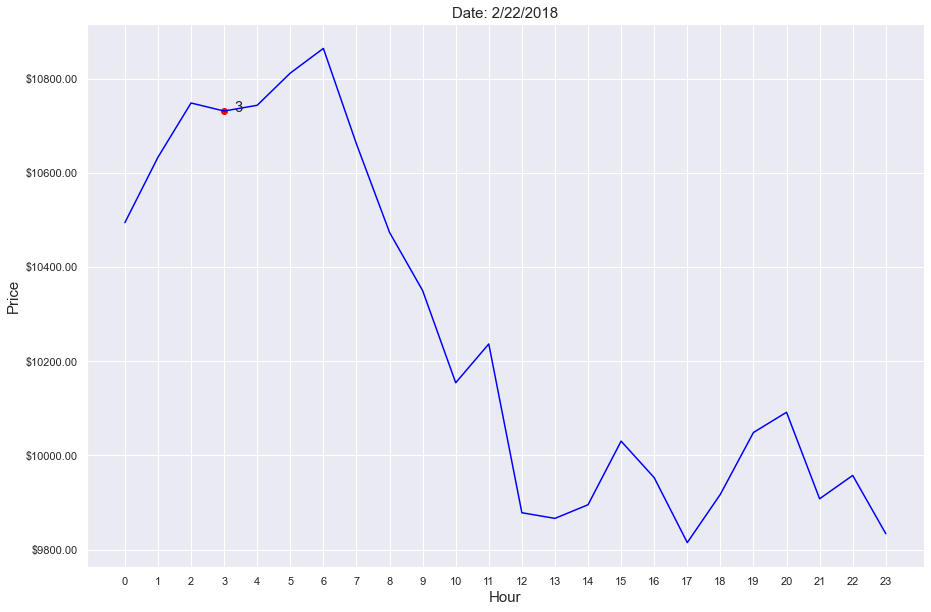

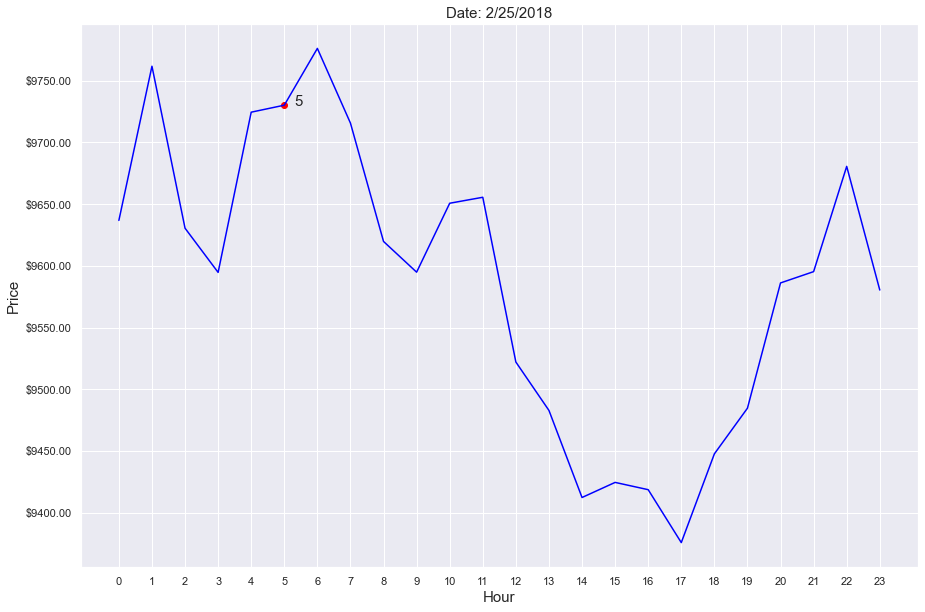

KeyboardInterrupt: 

In [13]:
import matplotlib.ticker as ticker
validTweets = tweetDf[(tweetDf['crypto_related'] == True)]
for i in range(2016,2022):
    for j in range(1,13):
        for k in range(1,32):
                x = btcDf[(btcDf['year'] == i) & (btcDf['month'] == j) & (btcDf['day'] == k)]
                y = validTweets[(validTweets['year'] == i) & (validTweets['month'] == j) & (validTweets['day'] == k)]
                if (y.empty == False) & (x.empty == False):
                    _, ax = plt.subplots(figsize=(15,10))
                    ax.set_title("Date: {month}/{day}/{year}".format(month = j, day = k, year = i), fontsize=15)
                    ax.set_xlabel("Hour", fontsize=15)
                    ax.set_ylabel("Price", fontsize=15)
                    formatter = ticker.FormatStrFormatter('$%1.2f')
                    ax.yaxis.set_major_formatter(formatter)
                    ax.set_xticks(range(0,24))
                    ax.plot(x['hour'],x['rate_close'], c = 'blue')
                    for p in range(0,24):
                        z = y[(y['hour'] == p)]
                        if(z.empty == False):
                            ax.scatter(x.iloc[p]['hour'],x.iloc[p]['rate_close'],c='red')
                            ax.annotate(x.iloc[p]['hour'], (x.iloc[p]['hour'] + .3, x.iloc[p]['rate_close']), fontsize=15)
                plt.show()

## Tweets corresponding to crypto mapped onto Doge historical month visualization

In [ ]:
for i in range(1,13):
    plt.figure(figsize=(20,10))
    for j in range(2016,2022):
        x = dogeDf[(dogeDf['hour'] == 23) & (dogeDf['year'] == j) & (dogeDf['month'] == i) ]
        plt.plot(x['day'],x['rate_close'])
        for k in x['day']:
            y = tweetDf[(tweetDf['month'] == i) & (tweetDf['year'] == j) & (tweetDf['crypto_related'] == True) & (tweetDf['day'] == k)]
            if y.empty == False:
                plt.scatter(k,x.iloc[k - 1]['rate_close'],c='red')
    plt.title(Months[i-1])
    plt.legend(Years)
    plt.xticks(days)
    plt.show()

## Doge Crypto Tweets mapped onto the corresponding price data for the respective closing price of that hour

In [ ]:
for i in range(2016,2022):
    for j in range(1,13):
        for k in range(1,32):
                x = dogeDf[(dogeDf['year'] == i) & (dogeDf['month'] == j) & (dogeDf['day'] == k)]
                y = validTweets[(validTweets['year'] == i) & (validTweets['month'] == j) & (validTweets['day'] == k)]
                if (y.empty == False) & (x.empty == False):
                    _, ax = plt.subplots(figsize=(15,10))
                    ax.set_title("Date: {month}/{day}/{year}".format(month = j, day = k, year = i), fontsize=15)
                    ax.set_xlabel("Hour", fontsize=15)
                    ax.set_ylabel("Price", fontsize=15)
                    formatter = ticker.FormatStrFormatter('$%1.6f')
                    ax.yaxis.set_major_formatter(formatter)
                    ax.set_xticks(range(0,24))
                    ax.plot(x['hour'],x['rate_close'], c = 'blue')
                    for p in range(0,24):
                        z = y[(y['hour'] == p)]
                        if(z.empty == False):
                            ax.scatter(x.iloc[p]['hour'],x.iloc[p]['rate_close'],c='red')
                            ax.annotate(x.iloc[p]['hour'], (x.iloc[p]['hour'] + .3, x.iloc[p]['rate_close']), fontsize=15)
                plt.show()